<a href="https://colab.research.google.com/github/ElBiologo/Repositorio1/blob/main/Patr%C3%B3n_de_actividad_diaria_de_la_especie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import vonmises
from scipy.special import i0
import numpy as np
from google.colab import files


In [ ]:
uploaded = files.upload()

In [ ]:
df = pd.read_excel('tatú.xlsx')
df

,input,clock,solar,Unnamed: 3,Fecha,original,lon,lat,Unnamed: 8,clock.1,solar.1
0,2022-10-28 22:57:00,5.222898,4.961028,NaN,2022-10-28,19:57:00,-32.03088,-56.88367,NaN,19:56:59,18:56:59
1,2022-10-29 06:38:00,0.951204,1.476799,NaN,2022-10-29,03:38:00,-32.03089,-56.88368,NaN,03:38:00,05:38:27
2,2022-11-08 02:55:00,6.261369,0.185390,NaN,2022-11-07,23:55:00,-32.03090,-56.88369,NaN,23:55:00,00:42:29
3,2022-11-09 03:44:00,0.191986,0.527983,NaN,2022-11-09,00:44:00,-32.03091,-56.88370,NaN,00:43:59,02:01:00
4,2022-11-12 07:36:00,1.204277,1.738991,NaN,2022-11-12,04:36:00,-32.03092,-56.88371,NaN,04:36:00,06:38:32
...,...,...,...,...,...,...,...,...,...,...,...
179,2023-10-18 05:10:00,0.567232,0.891170,NaN,2023-10-18,02:10:00,-31.78498,-56.88449,NaN,02:09:59,03:24:14
180,2023-10-18 05:10:00,0.567232,0.891170,NaN,2023-10-18,02:10:00,-31.78499,-56.88450,NaN,02:09:59,03:24:14
181,2023-10-18 05:10:00,0.567232,0.891170,NaN,2023-10-18,02:10:00,-31.78500,-56.88451,NaN,02:09:59,03:24:14
182,2023-10-18 05:11:00,0.571595,0.896870,NaN,2023-10-18,02:11:00,-31.78501,-56.88452,NaN,02:11:00,03:25:32


In [ ]:
data=df['solar'].values
data

array([4.9610283 , 1.47679891, 0.18538993, 0.52798325, 1.73899068,
       1.67248177, 4.93322832, 0.48587846, 5.94019691, 4.00882191,
       1.23738795, 5.99202942, 6.15254506, 1.11643746, 5.42452544,
       4.80665826, 5.23591753, 0.2702187 , 5.79691542, 6.23458212,
       5.26331443, 1.2434798 , 5.09206741, 5.88284409, 6.04252921,
       6.2492046 , 5.66917869, 6.26258182, 0.84259293, 1.08209175,
       0.47736154, 6.01505856, 6.16919494, 1.18860117, 5.60903983,
       5.69159149, 1.1156887 , 5.61314046, 5.81441537, 5.76348717,
       5.929308  , 0.33080977, 0.79010954, 5.88176518, 5.52977699,
       5.87060573, 0.19423637, 6.08454438, 6.08803613, 2.71509445,
       5.649929  , 5.65173137, 5.70516307, 6.04291959, 6.07726344,
       0.21430791, 5.72753261, 0.59364289, 6.08680893, 0.11249214,
       0.64227213, 0.84225245, 5.80943648, 0.87764008, 0.38979269,
       0.90974143, 6.08180859, 5.39103331, 5.81489453, 6.02653585,
       5.98731684, 6.06182462, 6.15981951, 5.68319664, 0.86165

In [ ]:
data2=df['clock'].values
data2

array([5.5457837 , 2.33001455, 2.37801111, 0.3577925 , 1.61442956,
       1.27409035, 1.24354709, 2.11184839, 2.44346095, 1.79768913,
       1.76278254, 2.8667033 , 1.74096593, 1.5838863 , 1.41808002,
       5.75085989, 1.73223928, 0.06981317, 1.47480322, 2.14675498,
       1.93731547, 0.38833576, 0.40142573, 0.41015237, 0.41887902,
       0.77667152, 2.19911486, 4.0927971 , 1.85877565, 5.38870407,
       6.27882198, 4.80838209, 0.63704518, 6.07810912, 5.99084266,
       0.95993109, 1.06028752, 1.08646746, 0.18325957, 0.2443461 ,
       4.30223661, 1.09955743, 0.83775804, 6.20900881, 0.38397244,
       1.73223928, 3.39030207, 4.95673508, 5.79449312, 5.82067306,
       1.13882734, 0.41887902, 5.84685299, 3.25503905, 4.91310184,
       6.27009534, 4.2629667 , 4.11897703, 4.23242344, 1.81514242,
       1.68860605, 4.63384916, 5.06145483, 5.93411946, 1.63188285,
       1.71478599, 4.42877298, 4.43749962, 2.29481708, 2.29627152,
       2.29772596, 2.306089  , 2.36128503, 2.38113815, 4.39553

In [ ]:
data_radians = data* (2 * np.pi)
data_radians


array([31.17106013,  9.27900124,  1.16483927,  3.31741657, 10.92640072,
       10.5085129 , 30.9963877 ,  3.05286438, 37.32335795, 25.18817091,
        7.7747378 , 37.64903118, 38.65758069,  7.01478342, 34.08329855,
       30.20112456, 32.89824008,  1.69783417, 36.42309381, 39.17303477,
       33.0703799 ,  7.81301398, 31.99440314, 36.96299953, 37.96633076,
       39.26491052, 35.62050022, 39.34896207,  5.29416752,  6.798983  ,
        2.99935099, 37.7937276 , 38.76219502,  7.46820139, 35.24263663,
       35.76132404,  7.01007885, 35.26840168, 36.53304922, 36.21305789,
       37.25494093,  2.07853911,  4.96440463, 36.95622054, 34.74461354,
       36.8861037 ,  1.2204231 , 38.23031988, 38.25225915, 17.05944155,
       35.49955091, 35.51087548, 35.84659675, 37.96878358, 38.18457235,
        1.34653628, 35.98714871,  3.72996826, 38.24454843,  0.70680897,
        4.0355148 ,  5.29202822, 36.50176594,  5.51437529,  2.4491397 ,
        5.71607398, 38.21313038, 33.87286131, 36.53605986, 37.86

In [ ]:
x=np.linspace (0, 6, 184)

In [ ]:
kappa = 20

In [ ]:
densidad = np.zeros_like(x)

In [ ]:
for d in data:
  densidad +=vonmises.pdf(x,kappa,loc=d)

In [ ]:
densidad/=(densidad.sum() * (x [1]- x[0]))

In [ ]:
densidad

array([5.23364846e-01, 4.95648789e-01, 4.67961609e-01, 4.41181326e-01,
       4.16043705e-01, 3.93114005e-01, 3.72781126e-01, 3.55270270e-01,
       3.40667686e-01, 3.28950202e-01, 3.20013072e-01, 3.13691707e-01,
       3.09775512e-01, 3.08014557e-01, 3.08121644e-01, 3.09773216e-01,
       3.12612388e-01, 3.16256514e-01, 3.20310400e-01, 3.24384879e-01,
       3.28119308e-01, 3.31205624e-01, 3.33411106e-01, 3.34596736e-01,
       3.34728188e-01, 3.33876904e-01, 3.32209634e-01, 3.29966101e-01,
       3.27426152e-01, 3.24869600e-01, 3.22533607e-01, 3.20573533e-01,
       3.19033344e-01, 3.17830676e-01, 3.16759662e-01, 3.15511850e-01,
       3.13712566e-01, 3.10967419e-01, 3.06911976e-01, 3.01257121e-01,
       2.93823499e-01, 2.84560442e-01, 2.73547522e-01, 2.60979724e-01,
       2.47139803e-01, 2.32363059e-01, 2.17000434e-01, 2.01385386e-01,
       1.85808718e-01, 1.70503635e-01, 1.55641341e-01, 1.41335699e-01,
       1.27654278e-01, 1.14632556e-01, 1.02288165e-01, 9.06327380e-02,
      

In [ ]:
densidad2 = np.zeros_like(x)

In [ ]:
for d in data2:
  densidad2 +=vonmises.pdf(x,kappa,loc=d)

NameError: name 'data2' is not defined

In [ ]:
densidad2/=(densidad2.sum() * (x [1]- x[0]))

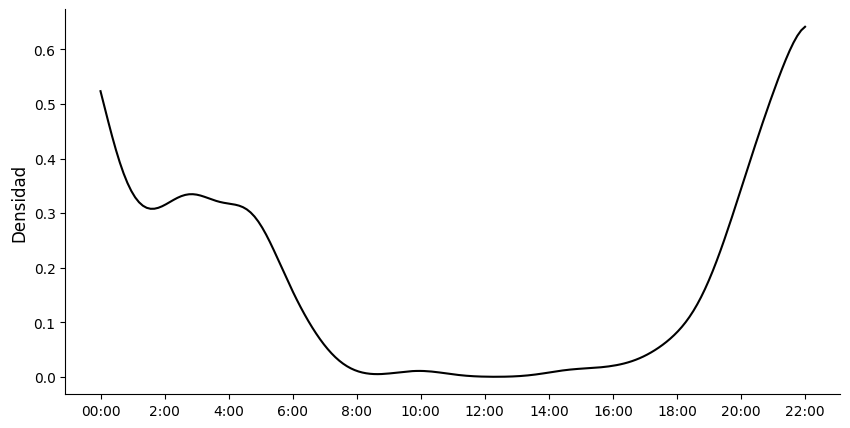

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(x, densidad, label='hora solar', color='black')
plt.xticks(
    ticks = np.linspace(0,6,12),
    labels= ['00:00','2:00','4:00','6:00','8:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00'],
    fontsize=10
)
plt.ylabel('Densidad', fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



In [ ]:
pip install astral

In [ ]:
from datetime import date
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime

In [ ]:
fechas = pd.date_range(start='2023-01-01', end='2023-12-31', freq="D")
fechas

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [ ]:
anochecer = []
amanecer = []
ubicacion = LocationInfo(name='Paysandu', region='Uruguay', timezone="America/Montevideo", latitude=-31.78611, longitude=-57.03667)
ubicacion.observer

Observer(latitude=-31.78611, longitude=-57.03667, elevation=0.0)

In [ ]:

for fecha in fechas:
  sun_time=sun(ubicacion.observer, date = fecha.date(),tzinfo=ubicacion.timezone)
  amanecer.append(sun_time['sunrise'])
  anochecer.append(sun_time['sunset'])

In [ ]:
df_sun= pd.DataFrame(
    {'Fechas':fechas,
     'Amanecer':amanecer,
     'Anochecer':anochecer}
)
df_sun

,Fechas,Amanecer,Anochecer
0,2023-01-01,2023-01-01 05:46:18.200064-03:00,2023-01-01 19:56:52.858809-03:00
1,2023-01-02,2023-01-02 05:47:02.103515-03:00,2023-01-02 19:57:04.235105-03:00
2,2023-01-03,2023-01-03 05:47:47.048387-03:00,2023-01-03 19:57:13.889957-03:00
3,2023-01-04,2023-01-04 05:48:32.989442-03:00,2023-01-04 19:57:21.810504-03:00
4,2023-01-05,2023-01-05 05:49:19.880948-03:00,2023-01-05 19:57:27.985643-03:00
...,...,...,...
360,2023-12-27,2023-12-27 05:42:46.624158-03:00,2023-12-27 19:55:25.612856-03:00
361,2023-12-28,2023-12-28 05:43:24.356773-03:00,2023-12-28 19:55:45.732071-03:00
362,2023-12-29,2023-12-29 05:44:03.356263-03:00,2023-12-29 19:56:04.226059-03:00
363,2023-12-30,2023-12-30 05:44:43.581495-03:00,2023-12-30 19:56:21.072763-03:00


In [ ]:
min_length = min(len(fechas), len(amanecer), len(anochecer))

fechas = fechas[:min_length]
amanecer = amanecer[:min_length]
anochecer = anochecer[:min_length]

In [ ]:
print(len(fechas))
print(len(amanecer))
print(len(anochecer))

365
365
365


In [ ]:
#amanecer_radians = df_sun['Amanecer'].dt.hour *2 *np.pi/24 + df_sun['Amanecer'].dt.minute * 2 * np.pi/1440
#anochecer_radians = df_sun['Anochecer'].dt.hour *2 *np.pi/24 + df_sun['Anochecer'].dt.minute * 2 * np.pi/1440
amanecer_radianes = df_sun['Amanecer'].apply(lambda x: (x.hour + x.minute / 60) * (2 * np.pi / 24))
anochecer_radianes = df_sun['Anochecer'].apply(lambda x: (x.hour + x.minute / 60) * (2 * np.pi / 24))


In [ ]:
import matplotlib.dates as mdates

In [ ]:
def convertir_a_radianes(hora):
    hora_decimal = hora.hour + hora.minute / 60 + hora.second / 3600
    return hora_decimal * (2 * np.pi / 24)

# Aplicar la conversión a las columnas de amanecer y anochecer
df_sun['Amanecer_radianes'] = df_sun['Amanecer'].apply(convertir_a_radianes)
df_sun['Anochecer_radianes'] = df_sun['Anochecer'].apply(convertir_a_radianes)


In [ ]:
df_sun

NameError: name 'df_sun' is not defined

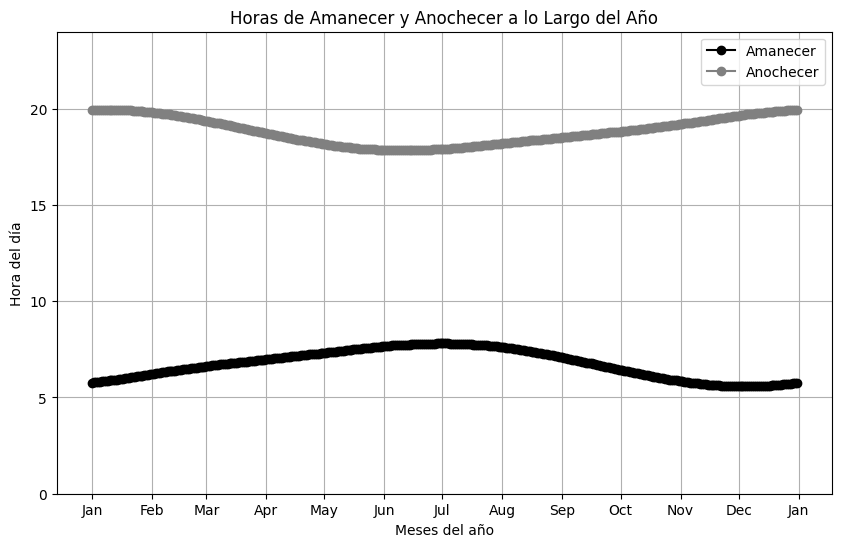

In [ ]:
df_sun['Fechas'] = pd.to_datetime(df_sun['Fechas'])
df_sun['Amanecer_hora'] = df_sun['Amanecer'].dt.hour + df_sun['Amanecer'].dt.minute / 60
df_sun['Anochecer_hora'] = df_sun['Anochecer'].dt.hour + df_sun['Anochecer'].dt.minute / 60

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_sun['Fechas'], df_sun['Amanecer_hora'], label='Amanecer', color='black', marker='o')
ax.plot(df_sun['Fechas'], df_sun['Anochecer_hora'], label='Anochecer', color='grey', marker='o')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_xlabel('Meses del año')
ax.set_ylabel('Hora del día')
ax.set_title('Horas de Amanecer y Anochecer a lo Largo del Año')

ax.set_ylim(0, 24)
ax.grid(True)

ax.legend()

plt.show()